In [56]:
import pathlib
import sys
import matplotlib.pyplot as plt
from tqdm.notebook import trange, tqdm


%load_ext autoreload
%autoreload 2

# TO CHANGE
# absolute path to ACCAL/ACCAL folder
appPath = pathlib.Path(r"D:\Stage\ACCAL\ACCAL")
sys.path.append(str(appPath))

#Kernel module
import numpy as np
import modules.features.kernel
import modules.features.selection
import modules.distance
import scipy.sparse


# Path to data 
dataFolderPath = pathlib.Path(r"D:\Stage\ACCAL\data\dataTest2","temp","features")



The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [57]:
import cv2

In [60]:
tempPath = pathlib.Path(r"D:\Stage\ACCAL\data\dataTest2","temp")

In [61]:
pathList = sorted(list(dataFolderPath.glob("*")))

In [62]:
nameList = [ path.stem for path in pathList]

In [63]:
def getImgFeat(tempPath:pathlib.Path,name:str):
    img = cv2.imread(str(pathlib.Path(tempPath,"croppedImages",name+".png")),cv2.IMREAD_COLOR)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    nbPixel,_,_ = np.shape(img)
    feat = np.load(pathlib.Path(tempPath,"features",name+".npy"))
    coord = np.array([[i%nbPixel,i//nbPixel] for i in feat])
    return img,coord

In [64]:
img,coord = getImgFeat(tempPath,nameList[0])

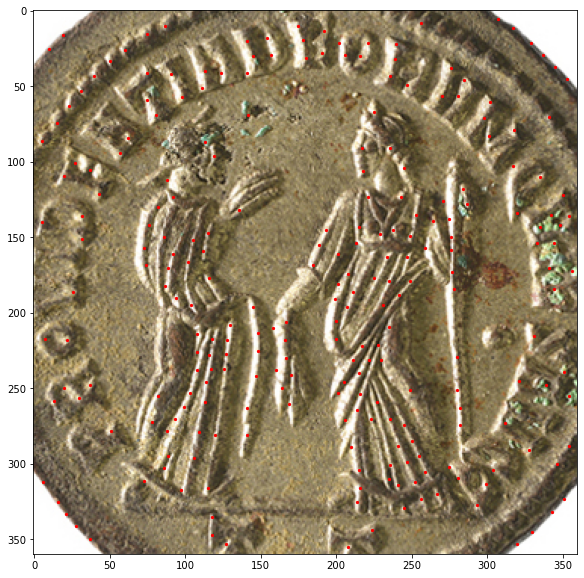

In [65]:
fig,ax = plt.subplots(figsize=(10,10))
plt.imshow(img)
plt.scatter(coord[:,0],coord[:,1],s=5,c='r')

In [66]:
import cv2


In [67]:
kp1 = []
for kp in coord:
    x,y = kp
    kp1.append(cv2.KeyPoint(int(x),int(y),1))

In [68]:
out = np.copy(img)
out = cv2.drawKeypoints(img,kp1,out)

In [69]:
def getUnFilteredMatch(img1:np.ndarray,features1:np.ndarray,img2:np.ndarray,features2:np.ndarray,reprojThreshold:float)->list:
    """return filtered Keypoint and  match between them

    Args:
        img1 (np.ndarray): _description_
        features1 (np.ndarray): _description_
        img2 (np.ndarray): _description_
        features2 (np.ndarray): _description_
        reprojThreshold (float): _description_

    Returns:
        list: _description_
    """
    keyPoint1 = []

    for coord in features1:
        x,y = coord
        keyPoint1.append(cv2.KeyPoint(int(x),int(y),1))
        
    keyPoint2 = []

    for coord in features2:
        x,y = coord
        keyPoint2.append(cv2.KeyPoint(int(x),int(y),1))
        
    
    orb = cv2.ORB_create()

    keyPoint1,des1 = orb.compute(img1,keyPoint1)
    keyPoint2,des2 = orb.compute(img2,keyPoint2)
    
    bf = cv2.BFMatcher(cv2.NORM_HAMMING,crossCheck=True)
    matches = bf.match(des1,des2)
    
    matches = sorted(matches,key=lambda x:x.distance)
    
    return [keyPoint1,keyPoint2,matches]


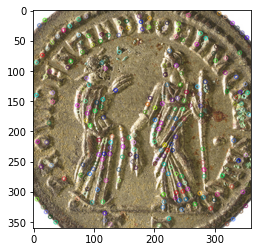

In [70]:
plt.imshow(out)

In [71]:
img1,coord1 = getImgFeat(tempPath,nameList[7])
img2,coord2 = getImgFeat(tempPath,nameList[18])

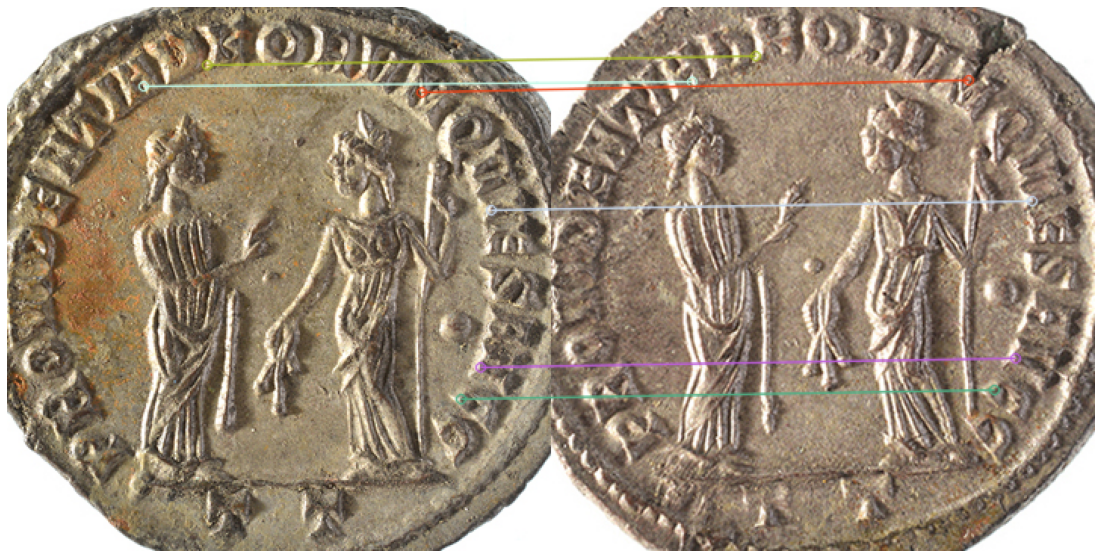

In [73]:
kp1,kp2,match = modules.distance.getFilteredMatch(img1,coord1,img2,coord2,1)

kp1U,kp2U,matchU = getUnFilteredMatch(img1,coord1,img2,coord2,0.1)

plt.figure(figsize=(20,10))
img3 = cv2.drawMatches(img1,kp1,img2,kp2,match,None,flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
plt.imshow(img3)
plt.axis("off")
plt.savefig("correspondance",bbox_inches='tight',dpi=300)

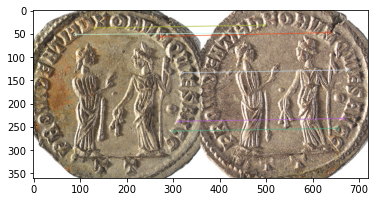

In [74]:
img4 = cv2.drawMatches(img1,kp1U,img2,kp2U,matchU,None,flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
plt.imshow(img3)


In [105]:
M.dot(np.array([190,210,1]).reshape(-1,1))

array([[-43.79982545],
       [-49.47037988],
       [ -0.24149134]])

## Utilisation fonction intégrés

In [23]:
tempPath = pathlib.Path(r"D:\Stage\ACCAL\data\dataTest1","temp")
pathList = sorted(list(dataFolderPath.glob("*")))
nameList = [ path.stem for path in pathList]
nb = len(nameList)

In [24]:
import modules.distance

In [25]:
#modules.distance.getImgFeat(tempPath,nameList[0])

In [26]:
Nb = np.zeros((nb,nb))
P = np.zeros((nb,nb))

In [27]:
for idx,name1 in enumerate(nameList):
    print(idx)
    img1,coord1 = modules.distance.getImgFeat(tempPath,name1)
    for idx2 in range(idx+1,nb):
        img2,coord2 = modules.distance.getImgFeat(tempPath,nameList[idx2])
        
        kp1,kp2,match = modules.distance.getFilteredMatch(img1,coord1,img2,coord2,3)
        
        [nbMatch,p] = modules.distance.getNbAndP(kp1,kp2,match)
        
        Nb[idx,idx2] = nbMatch
        P[idx,idx2] = p
        
        
    

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92


In [190]:
Nb = Nb.transpose() + Nb
P = P.transpose() + P


In [193]:
np.fill_diagonal(Nb,np.max(Nb))
np.fill_diagonal(P,np.min(P))

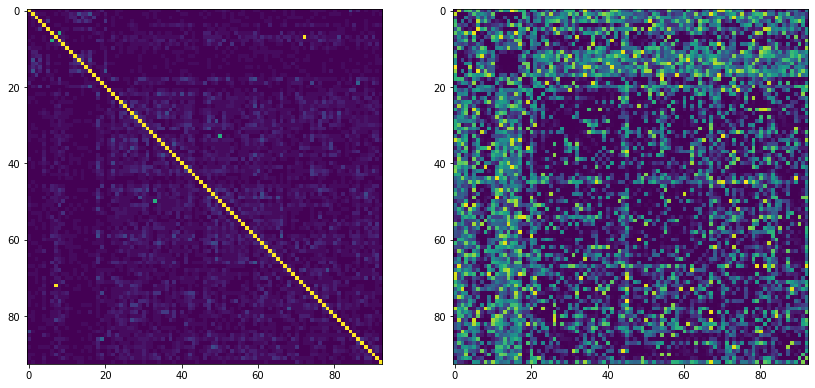

In [194]:
fig,axes=plt.subplots(1,2,figsize=(14,7))
ax1,ax2= axes
ax1.imshow(Nb)
ax2.imshow(P)

In [32]:
np.unravel_index(np.argmax(Nb),Nb.shape)

(72, 7)

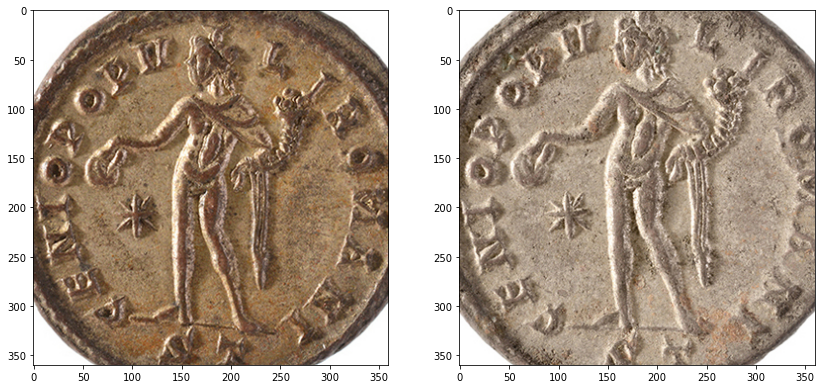

In [34]:
croppedImagesList = sorted(list(Path(tempPath,"croppedImages").glob("*.png")))

img1 = plt.imread(croppedImagesList[72])
img2 = plt.imread(croppedImagesList[7])

fig,axes=plt.subplots(1,2,figsize=(14,7))
ax1,ax2= axes
ax1.imshow(img1)
ax2.imshow(img2)


In [183]:
A = 1/Nb
B = np.log(P) 

C:\Users\alexa\AppData\Local\Temp\ipykernel_13576\1508461000.py:1: RuntimeWarning: divide by zero encountered in true_divide
  A = 1/Nb
C:\Users\alexa\AppData\Local\Temp\ipykernel_13576\1508461000.py:2: RuntimeWarning: divide by zero encountered in log
  B = np.log(P)


In [195]:
## normalisation step
minA = np.min(A)
maxA = np.max(A[A!=np.inf])

minB = np.min(B[B!=-np.inf])
maxB = np.max(B)


In [196]:
A = A - minA
A = A/np.max(A[A!=np.inf])

In [197]:
B = B-minB
B = B/np.max(B)

In [198]:
for idx,path in enumerate(croppedImagesList):
    if '18856'in path.stem:
        print(idx)

43


In [199]:
trueLiaisons = [[6,8],
                [7,72],
                [17,65],
                [33,50],
                [36,43]]

In [200]:
listCoord = []
listHist = []
for idx1 in range(nb):
    for idx2 in range(idx1+1,nb):
        
        x = A[idx2,idx1]
        y = B[idx2,idx1]
        z = x+y
        listHist.append(z)
        listCoord.append([x,y])
        

In [201]:
listV = []
listHistV = []
for liaison in trueLiaisons:
    a,b = liaison
    x = A[b,a]
    y = B[b,a]
    z = x+y
    listHistV.append(z)
    listV.append([x,y])
listV = np.array(listV)

Text(0, 0.5, 'log de la distance p')

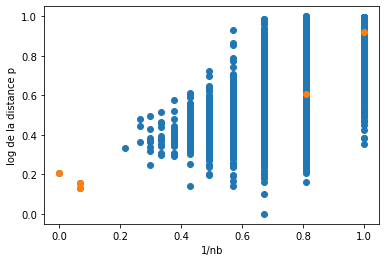

In [202]:
coordF = np.array(listCoord)
plt.scatter(coordF[:,0],coordF[:,1])
plt.scatter(listV[:,0],listV[:,1])
plt.xlabel("1/nb")
plt.ylabel("log de la distance p")

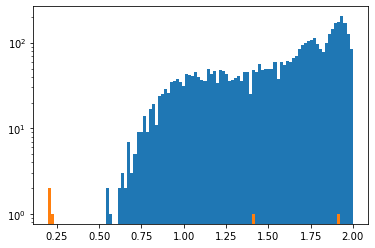

In [203]:

n,bins,patch = plt.hist(listHist,100,log=True)
plt.hist(listHistV,bins,log=True)
plt.show()

In [159]:
D = A+B

C:\Users\alexa\AppData\Local\Temp\ipykernel_13576\535995861.py:1: RuntimeWarning: invalid value encountered in add
  D = A+B


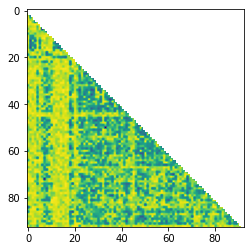

In [160]:
plt.imshow(D)